In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.DataFrame(pd.read_csv("/kaggle/input/advertising-dataset/advertising.csv"))
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum() / len(df) * 100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

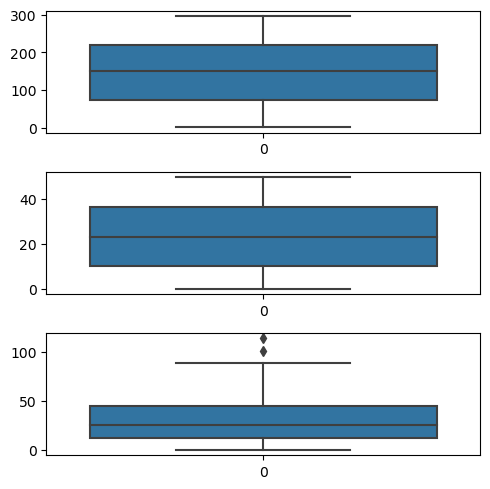

In [ ]:
# OA
fig, ax = plt.subplots(3, figsize = (5, 5))
plt1 = sns.boxplot(df["TV"], ax = ax[0])
plt2 = sns.boxplot(df["Radio"], ax = ax[1])
plt3 = sns.boxplot(df["Newspaper"], ax = ax[2])
plt.tight_layout()

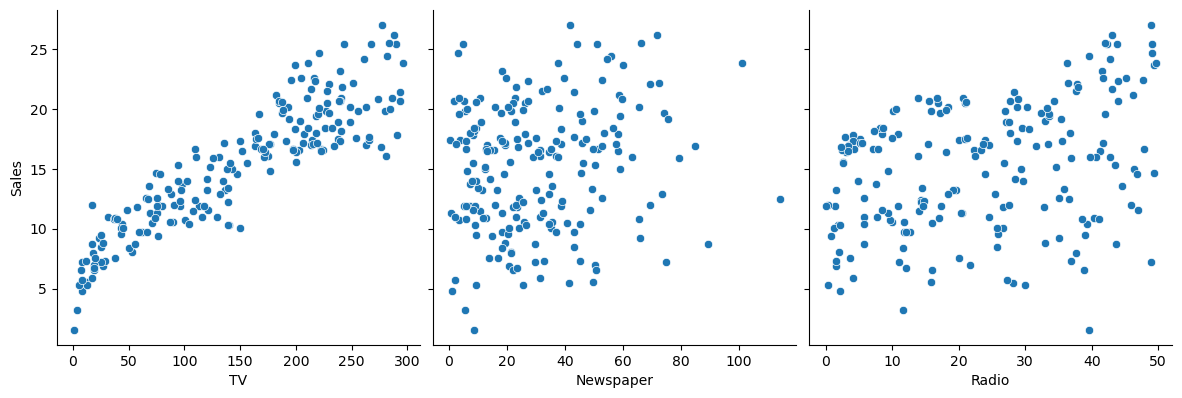

In [ ]:
sns.pairplot(df, x_vars = ["TV", "Newspaper", "Radio"], y_vars = "Sales", height = 4, aspect = 1, kind = "scatter")
plt.show()

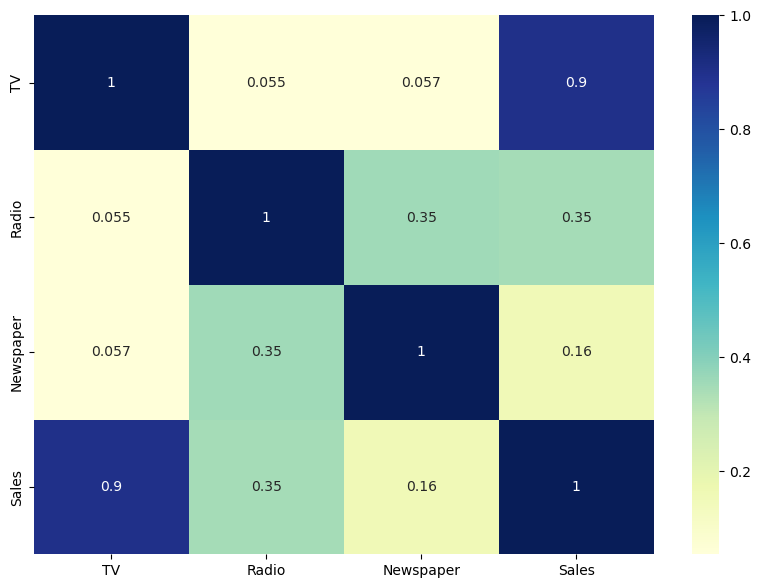

In [ ]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [ ]:
X = df["TV"]
y = df["Sales"]

In [ ]:
print(X.shape, y.shape)

(200,) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140,) (60,) (140,) (60,)


In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 29 May 2023   Prob (F-statistic):           1.52e-52
Time:                        08:02:59   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

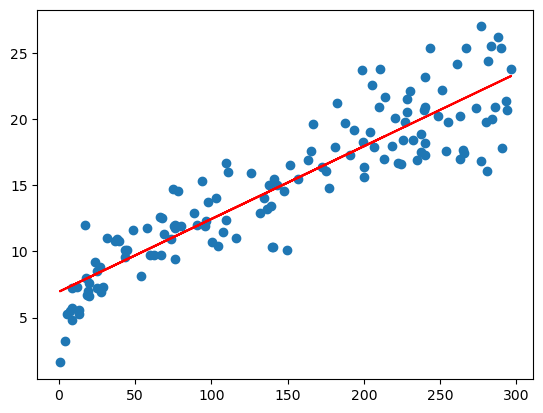

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487+ 0.055 * X_train, "r")
plt.show()

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

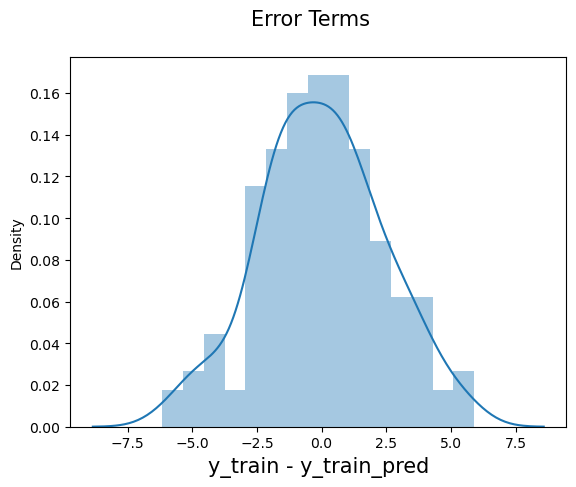

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle("Error Terms", fontsize = 15)
plt.xlabel("y_train - y_train_pred", fontsize = 15)
plt.show()

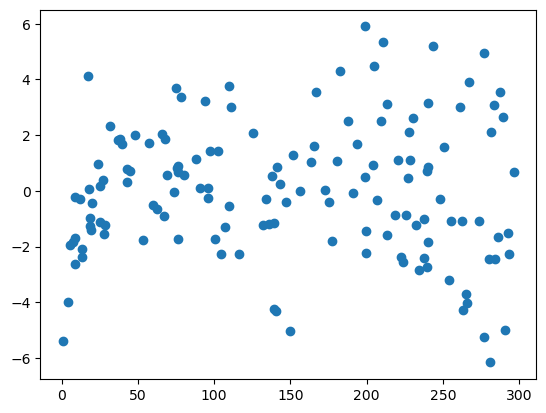

In [ ]:
plt.scatter(X_train, res)
plt.show()

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

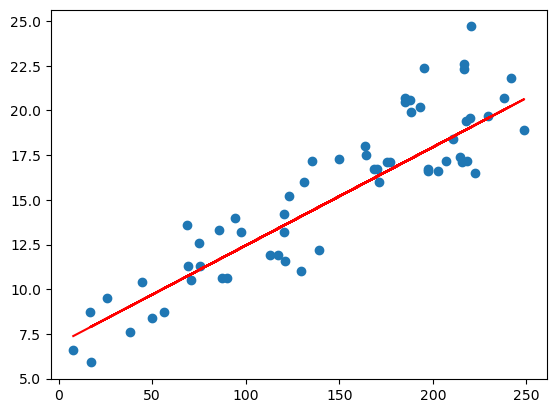

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9487+ 0.055 * X_test, "r")
plt.show()

You can use Docker to build and deploy your model. To do this, you will need to create a Dockerfile that defines the environment and dependencies needed to run your model. Once you have created a Dockerfile, you can build a Docker image using the docker build command. You can then deploy your model to a Docker container using the docker run command.

Here is an example of a Dockerfile that can be used to build a Docker image for your model:

In [ ]:
FROM pyspark

COPY requirements.txt /tmp/
RUN pip install -r /tmp/requirements.txt

COPY model.py /app/

CMD ["spark-submit", "-m", "local", "-n", "1", "-c", "app.py"]


This Dockerfile defines the environment and dependencies needed to run the model.py script. The CMD line specifies the command that will be executed when the Docker container is started. In this case, the spark-submit command will be used to submit the model.py script to a Spark cluster.

Once you have built a Docker image, you can deploy it to a Docker container using the following command:

In [ ]:
docker run -p 8080:8080 my-model


This command will start a Docker container that exposes port 8080. You can then access your model using a web browser by navigating to http://localhost:8080.